In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive


drive.mount('/content/drive')
root_path = 'drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_1'

Mounted at /content/drive


In [2]:
#when running from HDT: uncomment this
import sys, os
# when running from HDT: uncomment this
sys.path.append(root_path+"/Functions")

from general_functions import *
from muscle_functions import *
from constants_functions import *
from plot_functions import *
from save_functions import *

In [3]:
model_list = ["hux", "thijs", "stroeve"]  # ['hux','thijs','thijsfv0','stroeve']
'''
l_list = [
    "l0",
    "l0.05",
    "l0.1",
    "l0.15",
    "l0.2",
    "l0.25",
    "l0.3",
]  # ['l0','l0.1','l0.2','l0.3']
v_list = [
    "v1.0",
    "v1.5",
    "v2.0",
    "v2.5",
    "v3.0",
    "v3.5",
    "v4.0",
    "v4.5",
    "v5.0",
    "v5.5",
]  # ['v2.5','v3.0','v3.5','v4.0']
'''
l_list = [
    "l0"]
v_list = [
    "v2.0","v2.25",
    "v2.5","v2.75",
    "v3.0","v3.25",
    "v3.5","v3.75",
    "v4.0","v4.25",
    "v4.5","v4.75",
    "v5.0","v5.25","v5.5"
]
par_list = ["F_mtc", "l_mtc", "v_mtc"]
# framemin_variable=5000#14800
# framemax_variable2=int(fs*(2.02 +0.5/velocity_scale_factor))#15800

In [4]:

# str_name = "current_name=globals()[str(model_list[model_item])+'_'+str(l_list[l_item])+'_'+str(v_list[v_item])+'___stiff_start_newpos']"

# str_name = "current_name=str(model_list[0])+'_'+str(l_list[0])+'_'+str(v_list[0])+'___stiff_start_newpos'"
# exec(str_name)
fs = 2500
framemin_variable = 5000
tmax = 2.05
framemax_variable_all = int(fs * (tmax + 0.5 / 1.0))

data_all = np.zeros(
    (
        len(model_list),
        len(l_list),
        len(v_list),
        len(par_list),
        framemax_variable_all - framemin_variable,
    )
)  # [[[[]]*len(v_list)]*len(l_list)]*len(model_list)#[[[[[]]*len(v_list)]]*len(l_list)]*len(model_list)#np.zeros((len(model_list),len(l_list),len(v_list)))
for model_item in range(len(model_list)):
    for l_item in range(len(l_list)):
        for v_item in range(len(v_list)):
            framemax_variable = int(fs * (tmax + 0.5 / float(v_list[v_item][1:])))
            end_str = "___stiff_start_newpos"

            current_l = l_list[l_item]
            current_v = v_list[v_item]
            if (len(current_l) > 2) & (len(current_l) < 5):
                current_l = l_list[l_item][0] + l_list[l_item][1] + l_list[l_item][3]
            if len(current_l) == 5:
                # print(current_l)
                current_l = (
                    l_list[l_item][0]
                    + l_list[l_item][1]
                    + l_list[l_item][3]
                    + l_list[l_item][4]
                )
            #if len(current_v) > 2:
            #    current_v = v_list[v_item][0] + v_list[v_item][1] + v_list[v_item][3]
            if (len(current_v) > 2) & (len(current_v) < 5):
                current_v = v_list[v_item][0] + v_list[v_item][1] + v_list[v_item][3]
            if len(current_v) == 5:
                # print(current_l)
                current_v = (
                    v_list[v_item][0]
                    + v_list[v_item][1]
                    + v_list[v_item][3]
                    + v_list[v_item][4]
                )
            var_name = "var_str=str(model_list[model_item])+'_'+current_l+'_'+current_v+end_str"
            str_name = "current_str=str(model_list[model_item])+'_'+str(l_list[l_item])+'_'+str(v_list[v_item])+end_str"
            exec(var_name)
            exec(str_name)
            # print(current_str)
            # print(var_str)
            exec(var_str + "= xr.open_dataset('drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_1/Results/data/'+'6'+current_str)")


hux_l0_v30___stiff_start_newpos

<xarray.Dataset>
Dimensions:  (time: 5751)
Coordinates:
  * time     (time) float64 0.0 0.0004 0.0008 0.0012 ... 2.299 2.299 2.3 2.3
Data variables:
    Fce_mtc  (time) float64 ...
    Fse_mtc  (time) float64 ...
    F_mtc    (time) float64 ...
    v_mtc    (time) float64 ...
    l_mtc    (time) float64 ...
    STIM     (time) float64 ...
    lCE      (time) float64 ...
    lSE      (time) float64 ...
    KSE      (time) float64 ...
Attributes:
    description:  States over time

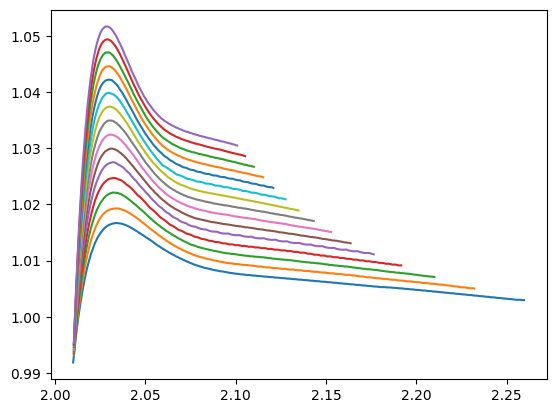

In [5]:

lmin = 5025
lmax = 5650
plt.plot(hux_l0_v20___stiff_start_newpos.time[lmin:lmax],hux_l0_v20___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5581
plt.plot(hux_l0_v225___stiff_start_newpos.time[lmin:lmax],hux_l0_v225___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5526
plt.plot(hux_l0_v25___stiff_start_newpos.time[lmin:lmax],hux_l0_v25___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5480
plt.plot(hux_l0_v275___stiff_start_newpos.time[lmin:lmax],hux_l0_v275___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5442
plt.plot(hux_l0_v30___stiff_start_newpos.time[lmin:lmax],hux_l0_v30___stiff_start_newpos.F_mtc[lmin:lmax])

lmin = 5026
lmax = 5410
plt.plot(hux_l0_v325___stiff_start_newpos.time[lmin:lmax],hux_l0_v325___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5383
plt.plot(hux_l0_v35___stiff_start_newpos.time[lmin:lmax],hux_l0_v35___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5359
plt.plot(hux_l0_v375___stiff_start_newpos.time[lmin:lmax],hux_l0_v375___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5338
plt.plot(hux_l0_v40___stiff_start_newpos.time[lmin:lmax],hux_l0_v40___stiff_start_newpos.F_mtc[lmin:lmax])

lmin = 5026
lmax = 5320
plt.plot(hux_l0_v425___stiff_start_newpos.time[lmin:lmax],hux_l0_v425___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5303
plt.plot(hux_l0_v45___stiff_start_newpos.time[lmin:lmax],hux_l0_v45___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5289
plt.plot(hux_l0_v475___stiff_start_newpos.time[lmin:lmax],hux_l0_v475___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5276
plt.plot(hux_l0_v50___stiff_start_newpos.time[lmin:lmax],hux_l0_v50___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5264
plt.plot(hux_l0_v525___stiff_start_newpos.time[lmin:lmax],hux_l0_v525___stiff_start_newpos.F_mtc[lmin:lmax])
lmin = 5026
lmax = 5253
plt.plot(hux_l0_v55___stiff_start_newpos.time[lmin:lmax],hux_l0_v55___stiff_start_newpos.F_mtc[lmin:lmax])



In [6]:

fs = 2500
framemin_variable = 5000
framemin_variable_true = 5026
framemax_true_vec = [5650,5581,5526,5480,5442,5410,5383,5359,5338,5320,5303,5289,5276,5264,5253]#[5526, 5442, 5383, 5338, 5303, 5276, 5253]  # 5650,
segment_list = np.linspace(0, 1, 21)  # [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
tmax = 2.05
framemax_variable_all = int(fs * (tmax + 0.5 / 1.0))
l_list = [
    "l0"]
v_list = [
    "v2.0","v2.25",
    "v2.5","v2.75",
    "v3.0","v3.25",
    "v3.5","v3.75",
    "v4.0","v4.25",
    "v4.5","v4.75",
    "v5.0","v5.25","v5.5"
]   # ['v2.5','v3.0','v3.5','v4.0','v4.5','v5.0','v5.5']#['v1.0','v1.5','v2.0','v2.5','v3.0','v3.5','v4.0','v4.5','v5.0','v5.5']
dsegment_data_sr = np.zeros(
    (len(model_list), len(l_list), len(segment_list), len(v_list), 3)
)  # df,dl,dv
for model_item in range(len(model_list)):
    for l_item in range(len(l_list)):
        for v_item in range(len(v_list)):
            framemax_variable = int(fs * (tmax + 0.5 / float(v_list[v_item][1:])))
            end_str = "___stiff_start_newpos"

            current_l = l_list[l_item]
            current_v = v_list[v_item]
            if (len(current_l) > 2) & (len(current_l) < 5):
                current_l = l_list[l_item][0] + l_list[l_item][1] + l_list[l_item][3]
            if len(current_l) == 5:
                # print(current_l)
                current_l = (
                    l_list[l_item][0]
                    + l_list[l_item][1]
                    + l_list[l_item][3]
                    + l_list[l_item][4]
                )
            #if len(current_v) > 2:
            #    current_v = v_list[v_item][0] + v_list[v_item][1] + v_list[v_item][3]
            if (len(current_v) > 2) & (len(current_v) < 5):
                current_v = v_list[v_item][0] + v_list[v_item][1] + v_list[v_item][3]
            if len(current_v) == 5:
                # print(current_l)
                current_v = (
                    v_list[v_item][0]
                    + v_list[v_item][1]
                    + v_list[v_item][3]
                    + v_list[v_item][4]
                )
            var_name = "var_str=str(model_list[model_item])+'_'+current_l+'_'+current_v+end_str"
            exec(var_name)
            str_name = "current_data=globals()[var_str]"
            exec(str_name)

            hux_var_name = "hux_var_str=str(model_list[0])+'_'+current_l+'_'+current_v+'___stiff_start_newpos'"
            exec(hux_var_name)
            hux_str_name = "hux_data=globals()[hux_var_str]"
            exec(hux_str_name)
            huxfdata = hux_data.F_mtc
            fdata = current_data.F_mtc
            ldata = current_data.l_mtc
            vdata = current_data.v_mtc
            for seg_item in range(len(segment_list) - 1):
                start_time = framemin_variable_true
                end_time = framemax_true_vec[v_item]
                dtime = end_time - start_time
                segment_start_time = int(segment_list[seg_item] * dtime + start_time)

                segment_end_time = int(
                    segment_list[seg_item + 1] * dtime + start_time - 1
                )
                # print(segment_start_time)
                # print(segment_end_time)
                f_starttime = fdata[segment_start_time].values
                f_endtime = fdata[segment_end_time].values
                l_starttime = ldata[segment_start_time].values
                l_endtime = ldata[segment_end_time].values
                dv = vdata[segment_end_time - 2].values
                dsegment_data_sr[model_item][l_item][seg_item][v_item][0] = (
                    f_endtime - f_starttime
                )
                dsegment_data_sr[model_item][l_item][seg_item][v_item][1] = (
                    l_endtime - l_starttime
                )
                dsegment_data_sr[model_item][l_item][seg_item][v_item][2] = dv

In [7]:
def func(X, k, b):
    l, v = X
    return k * l + b * v


stiffsegvals_sr = np.zeros(
    (len(model_list), len(l_list), len(segment_list) - 1, 2)
)  # k,b
for model_item in range(len(model_list)):
    for l_item in range(len(l_list)):
        for seg_item in range(len(segment_list) - 1):
            stiffsegvals_sr[model_item][l_item][seg_item] = scipy.optimize.curve_fit(
                func,
                (
                    -dsegment_data_sr[model_item][l_item][seg_item][:, 1],
                    dsegment_data_sr[model_item][l_item][seg_item][:, 2],
                ),
                dsegment_data_sr[model_item][l_item][seg_item][:, 0],
            )[0]

###

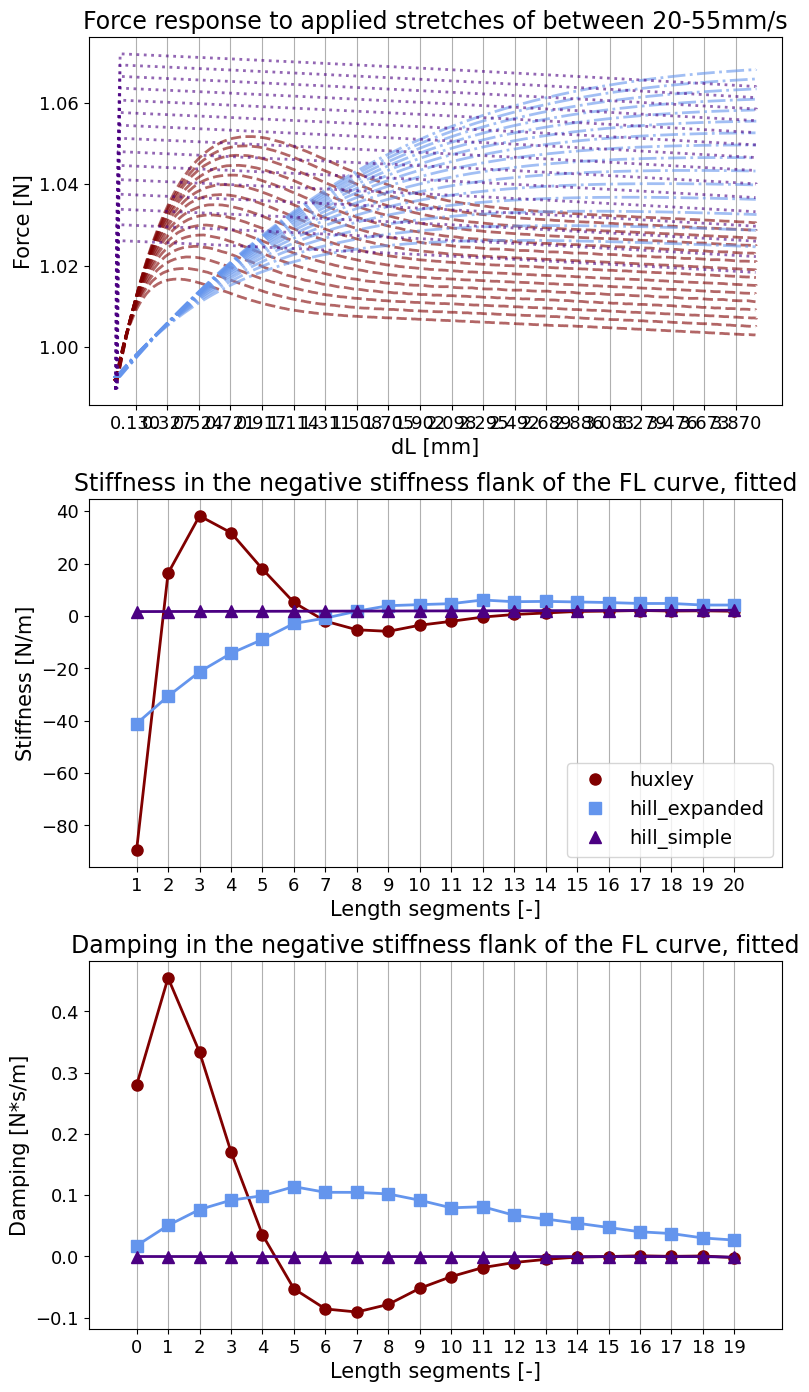

In [26]:
# lime, turquoise, steelblue
# maroon,cornflowerblue, indigo

framemax_true_vec = [5650,5581,5526,5480,5442,5410,5383,5359,5338,5320,5303,5289,5276,5264,5253]
begin = 5005

fig, axes = plt.subplots(3, 1, figsize=(8, 14))
huxdata20 = hux_l0_v20___stiff_start_newpos
huxdata225 = hux_l0_v225___stiff_start_newpos
huxdata25 = hux_l0_v25___stiff_start_newpos
huxdata275 = hux_l0_v275___stiff_start_newpos
huxdata30 = hux_l0_v30___stiff_start_newpos
huxdata325 = hux_l0_v325___stiff_start_newpos
huxdata35 = hux_l0_v35___stiff_start_newpos
huxdata375 = hux_l0_v375___stiff_start_newpos
huxdata40 = hux_l0_v40___stiff_start_newpos
huxdata425 = hux_l0_v425___stiff_start_newpos
huxdata45 = hux_l0_v45___stiff_start_newpos
huxdata475 = hux_l0_v475___stiff_start_newpos
huxdata50 = hux_l0_v50___stiff_start_newpos
huxdata525 = hux_l0_v525___stiff_start_newpos
huxdata55 = hux_l0_v55___stiff_start_newpos



thijsdata20 = thijs_l0_v20___stiff_start_newpos
thijsdata225 = thijs_l0_v225___stiff_start_newpos
thijsdata25 = thijs_l0_v25___stiff_start_newpos
thijsdata275 = thijs_l0_v275___stiff_start_newpos
thijsdata30 = thijs_l0_v30___stiff_start_newpos
thijsdata325 = thijs_l0_v325___stiff_start_newpos
thijsdata35 = thijs_l0_v35___stiff_start_newpos
thijsdata375 = thijs_l0_v375___stiff_start_newpos
thijsdata40 = thijs_l0_v40___stiff_start_newpos
thijsdata425 = thijs_l0_v425___stiff_start_newpos
thijsdata45 = thijs_l0_v45___stiff_start_newpos
thijsdata475 = thijs_l0_v475___stiff_start_newpos
thijsdata50 = thijs_l0_v50___stiff_start_newpos
thijsdata525 = thijs_l0_v525___stiff_start_newpos
thijsdata55 = thijs_l0_v55___stiff_start_newpos



stroevedata20 = stroeve_l0_v20___stiff_start_newpos
stroevedata225 = stroeve_l0_v225___stiff_start_newpos
stroevedata25 = stroeve_l0_v25___stiff_start_newpos
stroevedata275 = stroeve_l0_v275___stiff_start_newpos
stroevedata30 = stroeve_l0_v30___stiff_start_newpos
stroevedata325 = stroeve_l0_v325___stiff_start_newpos
stroevedata35 = stroeve_l0_v35___stiff_start_newpos
stroevedata375 = stroeve_l0_v375___stiff_start_newpos
stroevedata40 = stroeve_l0_v40___stiff_start_newpos
stroevedata425 = stroeve_l0_v425___stiff_start_newpos
stroevedata45 = stroeve_l0_v45___stiff_start_newpos
stroevedata475 = stroeve_l0_v475___stiff_start_newpos
stroevedata50 = stroeve_l0_v50___stiff_start_newpos
stroevedata525 = stroeve_l0_v525___stiff_start_newpos
stroevedata55 = stroeve_l0_v55___stiff_start_newpos

lw = 2
aa = 0.6

# axes[0].plot((huxdata20.l_mtc[begin:end]-0.35197)*1000,huxdata20.F_mtc[begin:end],color='maroon',linewidth=1,linestyle='--')
end = framemax_true_vec[0]
axes[0].plot((huxdata20.l_mtc[begin:end] - 0.35197) * 1000,huxdata20.F_mtc[begin:end],label="huxley",color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[1]
axes[0].plot((huxdata225.l_mtc[begin:end] - 0.35197) * 1000,huxdata225.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[2]
axes[0].plot((huxdata25.l_mtc[begin:end] - 0.35197) * 1000,huxdata25.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[3]
axes[0].plot((huxdata275.l_mtc[begin:end] - 0.35197) * 1000,huxdata275.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[4]
axes[0].plot((huxdata30.l_mtc[begin:end] - 0.35197) * 1000,huxdata30.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[5]
axes[0].plot((huxdata325.l_mtc[begin:end] - 0.35197) * 1000,huxdata325.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[6]
axes[0].plot((huxdata35.l_mtc[begin:end] - 0.35197) * 1000,huxdata35.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[7]
axes[0].plot((huxdata375.l_mtc[begin:end] - 0.35197) * 1000,huxdata375.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[8]
axes[0].plot((huxdata40.l_mtc[begin:end] - 0.35197) * 1000,huxdata40.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[9]
axes[0].plot((huxdata425.l_mtc[begin:end] - 0.35197) * 1000,huxdata425.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[10]
axes[0].plot((huxdata45.l_mtc[begin:end] - 0.35197) * 1000,huxdata45.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[11]
axes[0].plot((huxdata475.l_mtc[begin:end] - 0.35197) * 1000,huxdata475.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[12]
axes[0].plot((huxdata50.l_mtc[begin:end] - 0.35197) * 1000,huxdata50.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[13]
axes[0].plot((huxdata525.l_mtc[begin:end] - 0.35197) * 1000,huxdata525.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")
end = framemax_true_vec[14]
axes[0].plot((huxdata55.l_mtc[begin:end] - 0.35197) * 1000,huxdata55.F_mtc[begin:end],color="maroon",linewidth=lw,alpha=aa,linestyle="--")



end = framemax_true_vec[0]
axes[0].plot((thijsdata20.l_mtc[begin:end] - 0.35197) * 1000,thijsdata20.F_mtc[begin:end],label="hill_expanded",color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[1]
axes[0].plot((thijsdata225.l_mtc[begin:end] - 0.35197) * 1000,thijsdata225.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[2]
axes[0].plot((thijsdata25.l_mtc[begin:end] - 0.35197) * 1000,thijsdata25.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[3]
axes[0].plot((thijsdata275.l_mtc[begin:end] - 0.35197) * 1000,thijsdata275.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[4]
axes[0].plot((thijsdata30.l_mtc[begin:end] - 0.35197) * 1000,thijsdata30.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[5]
axes[0].plot((thijsdata325.l_mtc[begin:end] - 0.35197) * 1000,thijsdata325.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[6]
axes[0].plot((thijsdata35.l_mtc[begin:end] - 0.35197) * 1000,thijsdata35.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[7]
axes[0].plot((thijsdata375.l_mtc[begin:end] - 0.35197) * 1000,thijsdata375.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[8]
axes[0].plot((thijsdata40.l_mtc[begin:end] - 0.35197) * 1000,thijsdata40.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[9]
axes[0].plot((thijsdata425.l_mtc[begin:end] - 0.35197) * 1000,thijsdata425.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[10]
axes[0].plot((thijsdata45.l_mtc[begin:end] - 0.35197) * 1000,thijsdata45.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[11]
axes[0].plot((thijsdata475.l_mtc[begin:end] - 0.35197) * 1000,thijsdata475.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[12]
axes[0].plot((thijsdata50.l_mtc[begin:end] - 0.35197) * 1000,thijsdata50.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[13]
axes[0].plot((thijsdata525.l_mtc[begin:end] - 0.35197) * 1000,thijsdata525.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")
end = framemax_true_vec[14]
axes[0].plot((thijsdata55.l_mtc[begin:end] - 0.35197) * 1000,thijsdata55.F_mtc[begin:end],color="cornflowerblue",linewidth=lw,alpha=aa,linestyle="dashdot")



end = framemax_true_vec[0]
axes[0].plot((stroevedata20.l_mtc[begin:end] - 0.35197) * 1000,stroevedata20.F_mtc[begin:end],label="hill_simple",color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[1]
axes[0].plot((stroevedata225.l_mtc[begin:end] - 0.35197) * 1000,stroevedata225.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[2]
axes[0].plot((stroevedata25.l_mtc[begin:end] - 0.35197) * 1000,stroevedata25.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[3]
axes[0].plot((stroevedata275.l_mtc[begin:end] - 0.35197) * 1000,stroevedata275.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[4]
axes[0].plot((stroevedata30.l_mtc[begin:end] - 0.35197) * 1000,stroevedata30.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[5]
axes[0].plot((stroevedata325.l_mtc[begin:end] - 0.35197) * 1000,stroevedata325.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[6]
axes[0].plot((stroevedata35.l_mtc[begin:end] - 0.35197) * 1000,stroevedata35.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[7]
axes[0].plot((stroevedata375.l_mtc[begin:end] - 0.35197) * 1000,stroevedata375.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[8]
axes[0].plot((stroevedata40.l_mtc[begin:end] - 0.35197) * 1000,stroevedata40.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[9]
axes[0].plot((stroevedata425.l_mtc[begin:end] - 0.35197) * 1000,stroevedata425.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[10]
axes[0].plot((stroevedata45.l_mtc[begin:end] - 0.35197) * 1000,stroevedata45.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[11]
axes[0].plot((stroevedata475.l_mtc[begin:end] - 0.35197) * 1000,stroevedata475.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[12]
axes[0].plot((stroevedata50.l_mtc[begin:end] - 0.35197) * 1000,stroevedata50.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[13]
axes[0].plot((stroevedata525.l_mtc[begin:end] - 0.35197) * 1000,stroevedata525.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
end = framemax_true_vec[14]
axes[0].plot((stroevedata55.l_mtc[begin:end] - 0.35197) * 1000,stroevedata55.F_mtc[begin:end],color="indigo",linewidth=lw,alpha=aa,linestyle="dotted")
'''
axes[0].plot(
    (huxdata30.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata30.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)
axes[0].plot(
    (huxdata35.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata35.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)
axes[0].plot(
    (huxdata40.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata40.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)
axes[0].plot(
    (huxdata45.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata45.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)
axes[0].plot(
    (huxdata50.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata50.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)
axes[0].plot(
    (huxdata55.l_mtc[begin:end] - 0.35197) * 1000,
    huxdata55.F_mtc[begin:end],
    color="maroon",
    linewidth=lw,
    alpha=aa,
    linestyle="--",
)

'''
# axes[0].plot((np.mean(huxdata55.l_mtc[begin:end],huxdata25.l_mtc[begin:end])-0.35197)*1000,np.mean(huxdata55.F_mtc[begin:end],huxdata25.l_mtc[begin:end]),color='maroon',linewidth=1,linestyle='--')

# axes[0].plot((thijsdata20.l_mtc[begin:end]-0.35197)*1000,thijsdata20.F_mtc[begin:end],color='cornflowerblue',linewidth=1,linestyle='dashdot')
'''
axes[0].plot(
    (thijsdata25.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata25.F_mtc[begin:end],
    label="hill_expanded",
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata30.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata30.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata35.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata35.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata40.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata40.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata45.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata45.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata50.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata50.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)
axes[0].plot(
    (thijsdata55.l_mtc[begin:end] - 0.35197) * 1000,
    thijsdata55.F_mtc[begin:end],
    color="cornflowerblue",
    linewidth=lw,
    alpha=aa,
    linestyle="dashdot",
)




# axes[0].plot((stroevedata20.l_mtc[begin:end]-0.35197)*1000,stroevedata20.F_mtc[begin:end],color='indigo',linewidth=1,linestyle='dotted')
axes[0].plot(
    (stroevedata25.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata25.F_mtc[begin:end],
    label="hill_simple",
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
axes[0].plot(
    (stroevedata30.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata30.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
axes[0].plot(
    (stroevedata35.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata35.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
axes[0].plot(
    (stroevedata40.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata40.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)  # axes[0].plot(np.array(segment_list)*416/2500+2.0+26/2500,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)),'o',color='black',label='segment ends',markersize=4)
axes[0].plot(
    (stroevedata45.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata45.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
axes[0].plot(
    (stroevedata50.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata50.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
axes[0].plot(
    (stroevedata55.l_mtc[begin:end] - 0.35197) * 1000,
    stroevedata55.F_mtc[begin:end],
    color="indigo",
    linewidth=lw,
    alpha=aa,
    linestyle="dotted",
)
'''
# axes[0].plot(np.array(segment_list)*0.4,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)),color='black')
# axes[0].plot(np.array(segment_list)*0.4,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)),'o',color='black',markersize=4)#,label='segment ends'
# axes[0].plot(np.array(segment_list)*0.4,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)),color='black')
# axes[0].plot(np.array(segment_list[:-1])*0.4+0.01,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)-1),'|',color='black',label='segments',markersize=18)

# axes[0].plot(np.array(segment_list[:-1])/1000+0.352+0.001,(data3.F_mtc[begin:end][0].values-0.001)*np.ones(len(segment_list)-1),'|',color='black',label='segments',markersize=18)


axes[0].tick_params(axis="both",  labelsize=13)
#axes[0].legend(fontsize=12, loc="best")
axes[0].set_title(
    "Force response to applied stretches of between 20-55mm/s", fontsize=17
)  # 0.0024 m/s
axes[0].set_xlabel("dL [mm]", fontsize=15)  # ('Length [mm]*352',fontsize=15)
axes[0].set_ylabel("Force [N]", fontsize=15)
axes[0].margins(x=0.04)
axes[1].set_title(
    "Stiffness in the negative stiffness flank of the FL curve, fitted", fontsize=17
)
axes[1].xaxis.grid()
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 0],
    "o",
    markersize=8,
    label="huxley",
    color="maroon",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 0],
    linewidth=2,
    color="maroon",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 0],
    "s",
    markersize=8,
    label="hill_expanded",
    color="cornflowerblue",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 0],
    linewidth=2,
    color="cornflowerblue",
)
# plt.plot(range(len(segment_list)-1),stiffsegvals_sr[2][0][:,0],'o',markersize=12,label='hill_expanded(thijs)(noFV)')
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 0],
    "^",
    markersize=8,
    label="hill_simple",
    color="indigo",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 0],
    linewidth=2,
    color="indigo",
)
axes[1].set_xticks(range(len(segment_list) - 1))
# axes[1].set_xticklabels(np.round(np.array(segment_list)/5+2.0+26/2500, 2))
axes[1].set_xticklabels(np.array(range(len(segment_list) - 1)) + 1)
axes[1].set_ylabel("Stiffness [N/m]", fontsize=15)
axes[1].set_xlabel("Length segments [-]", fontsize=15)
axes[1].legend(fontsize=14)
axes[1].margins(x=0.08)
axes[1].tick_params(axis="both", which="major", labelsize=13)
axes[2].set_title(
    "Damping in the negative stiffness flank of the FL curve, fitted", fontsize=17
)
axes[2].xaxis.grid()
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 1],
    "o",
    markersize=8,
    label="huxley",
    color="maroon",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 1],
    linewidth=2,
    color="maroon",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 1],
    "s",
    markersize=8,
    label="hill_expanded",
    color="cornflowerblue",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 1],
    linewidth=2,
    color="cornflowerblue",
)
# plt.plot(range(len(segment_list)-1),stiffsegvals_sr[2][0][:,1],'o',markersize=12,label='hill_expanded(thijs)(noFV)')
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 1],
    "^",
    markersize=8,
    label="hill_simple",
    color="indigo",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 1],
    linewidth=2,
    color="indigo",
)
axes[2].margins(x=0.08)
axes[2].tick_params(axis="both", which="major", labelsize=13)
axes[2].set_xticks(range(len(segment_list) - 1))
# axes[2].set_xticklabels(np.round(np.array(segment_list)/5+2.0+26/2500, 2))
axes[2].set_ylabel("Damping [N*s/m]", fontsize=15)
axes[2].set_xlabel("Length segments [-]", fontsize=15)
#axes[2].legend(fontsize=14)
from matplotlib.ticker import AutoMinorLocator, FixedLocator

axes[0].grid(axis = 'x',which = "major")
axes[0].xaxis.set_major_locator(FixedLocator(np.linspace(0.13,3.87,20)))

fig.tight_layout(pad=1.0)
fig.savefig("drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_1/Results/1a2_stiffness.png")

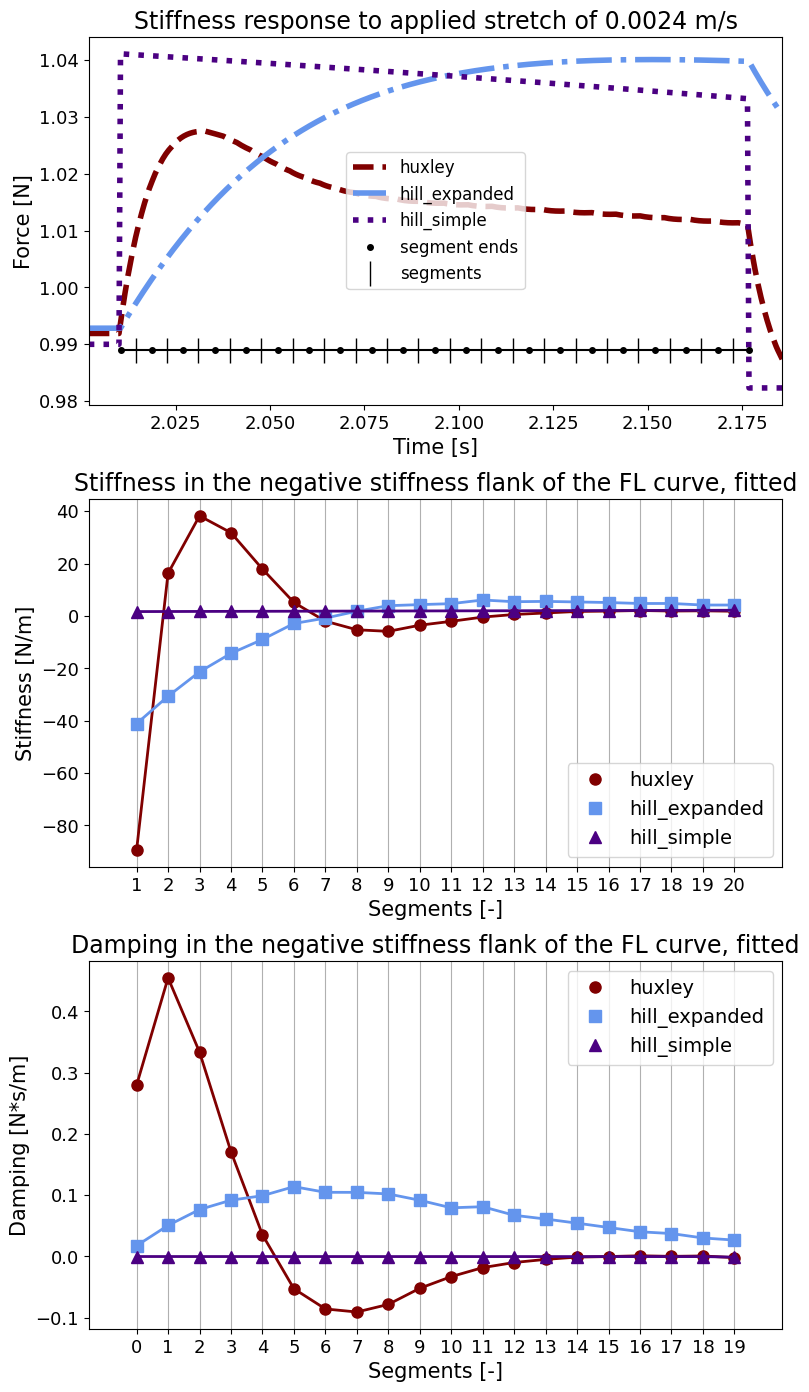

In [10]:
# lime, turquoise, steelblue
# maroon,cornflowerblue, indigo


begin = 5005
end = 5465
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
data1 = hux_l0_v30___stiff_start_newpos
axes[0].plot(
    data1.time[begin:end],
    data1.F_mtc[begin:end],
    label="huxley",
    color="maroon",
    linewidth=4,
    linestyle="--",
)
data2 = thijs_l0_v30___stiff_start_newpos
axes[0].plot(
    data2.time[begin:end],
    data2.F_mtc[begin:end],
    label="hill_expanded",
    color="cornflowerblue",
    linewidth=4,
    linestyle="dashdot",
)
# data = thijsfv0_l0_v25___stiff_start_newpos
# plt.plot(data.time[5000:],data.F_mtc[5000:])
data3 = stroeve_l0_v30___stiff_start_newpos
axes[0].plot(
    data3.time[begin:end],
    data3.F_mtc[begin:end],
    label="hill_simple",
    color="indigo",
    linewidth=4,
    linestyle="dotted",
)
axes[0].plot(
    np.array(segment_list) * 416 / 2500 + 2.0 + 26 / 2500,
    (data3.F_mtc[begin:end][0].values - 0.001) * np.ones(len(segment_list)),
    "o",
    color="black",
    label="segment ends",
    markersize=4,
)
axes[0].plot(
    np.array(segment_list) * 416 / 2500 + 2.0 + 26 / 2500,
    (data3.F_mtc[begin:end][0].values - 0.001) * np.ones(len(segment_list)),
    color="black",
)
axes[0].plot(
    np.array(segment_list[:-1]) * 416 / 2500 + 2.0 + 26 / 2500 + 0.004,
    (data3.F_mtc[begin:end][0].values - 0.001) * np.ones(len(segment_list) - 1),
    "|",
    color="black",
    label="segments",
    markersize=18,
)
axes[0].tick_params(axis="both", which="major", labelsize=13)
axes[0].legend(fontsize=12, loc="center")
axes[0].set_title("Stiffness response to applied stretch of 0.0024 m/s", fontsize=17)
axes[0].set_xlabel("Time [s]", fontsize=15)
axes[0].set_ylabel("Force [N]", fontsize=15)
axes[0].margins(x=0)
axes[1].set_title(
    "Stiffness in the negative stiffness flank of the FL curve, fitted", fontsize=17
)
axes[1].grid(axis = "x")
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 0],
    "o",
    markersize=8,
    label="huxley",
    color="maroon",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 0],
    linewidth=2,
    color="maroon",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 0],
    "s",
    markersize=8,
    label="hill_expanded",
    color="cornflowerblue",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 0],
    linewidth=2,
    color="cornflowerblue",
)
# plt.plot(range(len(segment_list)-1),stiffsegvals_sr[2][0][:,0],'o',markersize=12,label='hill_expanded(thijs)(noFV)')
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 0],
    "^",
    markersize=8,
    label="hill_simple",
    color="indigo",
)
axes[1].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 0],
    linewidth=2,
    color="indigo",
)
axes[1].set_xticks(range(len(segment_list) - 1))
# axes[1].set_xticklabels(np.round(np.array(segment_list)/5+2.0+26/2500, 2))
axes[1].set_xticklabels(np.array(range(len(segment_list) - 1)) + 1)
axes[1].set_ylabel("Stiffness [N/m]", fontsize=15)
axes[1].set_xlabel("Segments [-]", fontsize=15)
axes[1].legend(fontsize=14)
axes[1].margins(x=0.08)
axes[1].tick_params(axis="both", which="major", labelsize=13)
axes[2].set_title(
    "Damping in the negative stiffness flank of the FL curve, fitted", fontsize=17
)
axes[2].grid(axis = "x")
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 1],
    "o",
    markersize=8,
    label="huxley",
    color="maroon",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[0][0][:, 1],
    linewidth=2,
    color="maroon",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 1],
    "s",
    markersize=8,
    label="hill_expanded",
    color="cornflowerblue",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[1][0][:, 1],
    linewidth=2,
    color="cornflowerblue",
)
# plt.plot(range(len(segment_list)-1),stiffsegvals_sr[2][0][:,1],'o',markersize=12,label='hill_expanded(thijs)(noFV)')
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 1],
    "^",
    markersize=8,
    label="hill_simple",
    color="indigo",
)
axes[2].plot(
    range(len(segment_list) - 1),
    stiffsegvals_sr[2][0][:, 1],
    linewidth=2,
    color="indigo",
)
axes[2].margins(x=0.08)
axes[2].tick_params(axis="both", which="major", labelsize=13)
axes[2].set_xticks(range(len(segment_list) - 1))
# axes[2].set_xticklabels(np.round(np.array(segment_list)/5+2.0+26/2500, 2))
axes[2].set_ylabel("Damping [N*s/m]", fontsize=15)
axes[2].set_xlabel("Segments [-]", fontsize=15)
axes[2].legend(fontsize=14)

fig.tight_layout(pad=1.0)
fig.savefig("drive/My Drive/TU/Master/MEP/Paper/Working_file_copied_from_final_code/Experiment_1/Results/1a_stiffness.png")

In [ ]:
maxhill_expanded_k = np.max(stiffsegvals_sr[1][0][:, 0])
maxhux_k = np.max(stiffsegvals_sr[0][0][:, 0])
print("Max hill_expanded stiffness")
print(maxhill_expanded_k)
print("Max hux stiffness")
print(maxhux_k)
print(
    "which is "
    + str((maxhux_k - maxhill_expanded_k) * 100 / maxhill_expanded_k)
    + "% higher than the maximum stiffness in the hill_expanded model"
)

In [ ]:
maxhill_expanded_b = np.max(stiffsegvals_sr[1][0][:, 1])
maxhux_b = np.max(stiffsegvals_sr[0][0][:, 1])
print("Max hill_expanded damping")
print(maxhill_expanded_b)
print("Max hux damping")
print(maxhux_b)
print(
    "which is "
    + str((maxhux_b - maxhill_expanded_b) * 100 / maxhill_expanded_b)
    + "% higher than the maximum damping in the hill_expanded model"
)